In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
insurance = pd.read_csv(r"D:\insurance.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Figure size 1000x600 with 0 Axes>

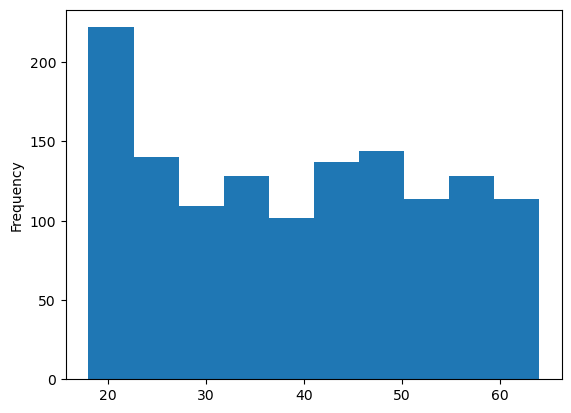

In [3]:
insurance["age"].plot(kind='hist')
plt.Figure(figsize=(10,6))

<Axes: ylabel='Frequency'>

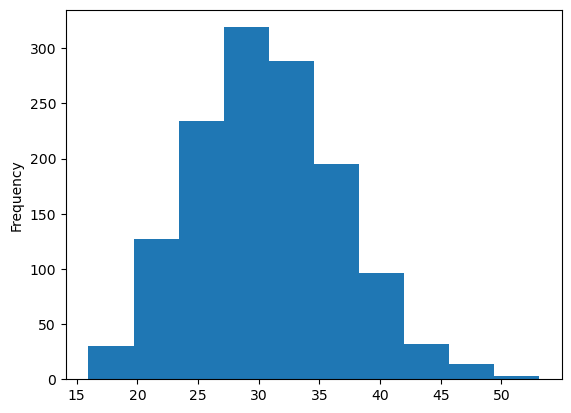

In [4]:
insurance["bmi"].plot(kind='hist')

In [5]:
insurance["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [6]:
ct = make_column_transformer(
	(MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown='ignore'),["sex", "smoker", "region"]),
	remainder='passthrough'
)

In [7]:
X=insurance.drop('charges',axis=1)
y=insurance['charges']

In [8]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((936, 6), (402, 6), (936,), (402,))

In [9]:
test_X_2,val_X,test_y_2,val_y = train_test_split(test_x,test_y,test_size=0.3,random_state=42)

In [10]:
test_X_2.shape,val_X.shape,test_y_2.shape,val_y.shape

((281, 6), (121, 6), (281,), (121,))

In [11]:
ct.fit(train_x)
train_X_normalized=ct.transform(train_x)
test_X_2_normalized=ct.transform(test_X_2)
val_X_normalized=ct.transform(val_X)

In [12]:
train_x.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [13]:
train_X_normalized[0]

array([0.93478261, 0.40893193, 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [14]:
train_X_normalized.shape,train_x.shape

((936, 11), (936, 6))

In [15]:
insurance_model_2=Sequential()
insurance_model_2.add(Dense(100,activation='relu',input_shape=(train_X_normalized.shape[1],)))
insurance_model_2.add(Dense(50,activation='relu'))
insurance_model_2.add(Dense(25,activation='relu'))
insurance_model_2.add(Dense(10,activation='relu'))
insurance_model_2.add(Dense(1))

In [16]:
insurance_model_2.compile(optimizer='adam',loss='mae',metrics=['mae'])

In [ ]:
history_2=insurance_model_2.fit(train_X_normalized, train_y, epochs=1500, validation_data=(test_X_2_normalized, test_y_2))

<Axes: >

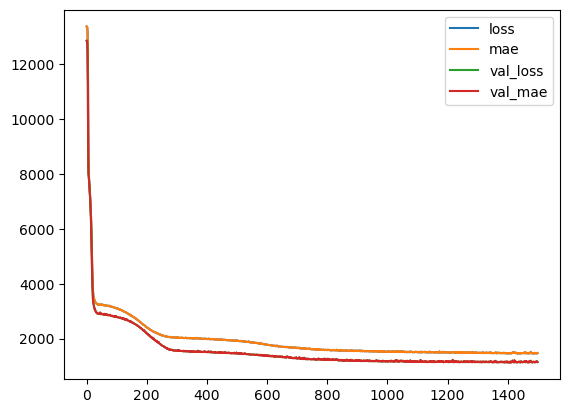

In [18]:
pd.DataFrame(history_2.history).plot()

In [19]:
insurance_model_2.evaluate(test_X_2_normalized, test_y_2)

9/9 [==============================] - 0s 3ms/step - loss: 1149.3489 - mae: 1149.3489


[1149.348876953125, 1149.348876953125]

In [20]:
predicted_charges=insurance_model_2.predict(val_X_normalized)

4/4 [==============================] - 0s 2ms/step


In [21]:
df=pd.DataFrame(data=val_y)
df['predicted_charges']=predicted_charges

In [22]:
df_results = pd.DataFrame(data={'Actual':val_y, 'Predicted':predicted_charges.flatten()})
df_results['Difference'] = df_results['Actual'] - df_results['Predicted']

In [23]:
print(df_results.head(50))

           Actual     Predicted    Difference
10     2721.32080   2726.866211     -5.545411
199   14901.51670  14758.948242    142.568458
1119   5693.43050   5717.510254    -24.079754
661   22192.43711  12046.752930  10145.684180
755    5031.26955   5051.188965    -19.919415
1047  44501.39820  44763.070312   -261.672112
1159   3989.84100   4035.365723    -45.524723
1118  38282.74950  38316.699219    -33.949719
1078  34672.14720  34673.226562     -1.079363
415    7345.72660   7342.275391      3.451209
707   10264.44210  10288.390625    -23.948525
1224   6858.47960   6844.751465     13.728135
101    3645.08940   3644.956787      0.132613
1280   8283.68070   8275.416016      8.264684
1127   5836.52040   5822.528320     13.992080
945   11674.13000  11741.904297    -67.774297
858   18218.16139   3231.292236  14986.869154
947   39047.28500  39175.613281   -128.328281
1167   4529.47700   4555.783691    -26.306691
976    7804.16050   7762.181152     41.979348
447   11454.02150  11452.166992   

In [24]:
from sklearn.metrics import r2_score

r2 = r2_score(val_y, predicted_charges)

In [25]:
print("R²:", r2)

R²: 0.8336568489459848


In [27]:
insurance_model_2.save(r"C:\Users\HP\Documents\Codes\ML_codes\Tensorflow_Projects\insurance_model.h5")

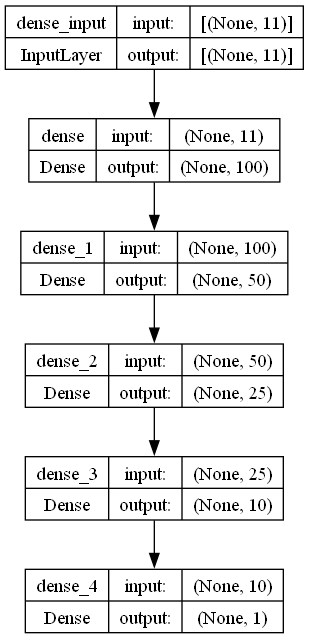

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(insurance_model_2,show_shapes=True,show_layer_names=True)